# Importování Knihoven

In [28]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Příprava Datasetu

In [29]:
data_dir = 'images' 

In [30]:
os.listdir(data_dir)

['lizard', 'snake']

In [31]:
data = tf.keras.utils.image_dataset_from_directory('images')

Found 1020 files belonging to 2 classes.


In [32]:
data_it = data.as_numpy_iterator()

In [33]:
batch = data_it.next()

In [34]:
batch[0].shape

(32, 256, 256, 3)

In [35]:
batch[1]
# 0 - lizard
# 1 - snake

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

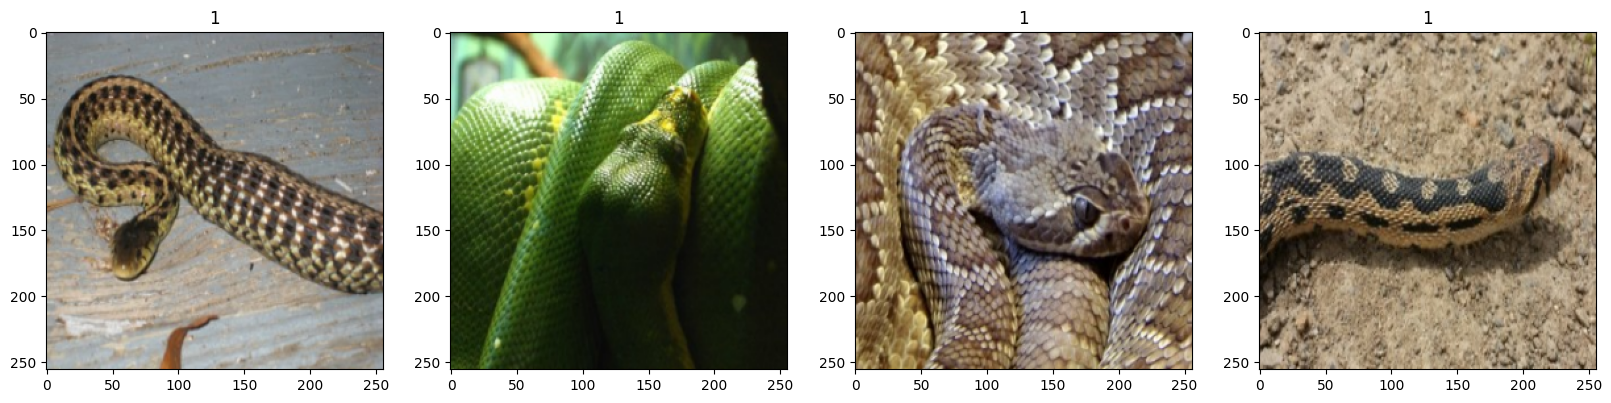

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[0.03169292, 0.03169292, 0.03953606],
          [0.03525953, 0.03525953, 0.04310267],
          [0.03356969, 0.03356969, 0.04141283],
          ...,
          [0.2935815 , 0.2661305 , 0.19162071],
          [0.28146842, 0.25983852, 0.1853287 ],
          [0.27126226, 0.25165442, 0.1771446 ]],
 
         [[0.02749299, 0.02749299, 0.03533613],
          [0.02643995, 0.02643995, 0.03428309],
          [0.02354916, 0.02354916, 0.03139229],
          ...,
          [0.2975337 , 0.27010247, 0.19553342],
          [0.28255555, 0.26085743, 0.18638174],
          [0.27135417, 0.25165442, 0.17719056]],
 
         [[0.03103554, 0.03103554, 0.03887868],
          [0.02643995, 0.02643995, 0.03428309],
          [0.02524737, 0.02524737, 0.03309051],
          ...,
          [0.3014859 , 0.27569783, 0.19603474],
          [0.2893842 , 0.26195297, 0.19023761],
          [0.279252  , 0.251801  , 0.1812062 ]],
 
         ...,
 
         [[0.6933036 , 0.6037684 , 0.43871891],
          [0.68625

In [39]:
len(data)

32

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
test_size

3

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Sestavení a trénování modelu

In [43]:
model = Sequential([])

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=100, verbose=1, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
22/22 [==============================] - 19s 796ms/step - loss: 2.3847 - accuracy: 0.5256 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 2/100
22/22 [==============================] - 17s 779ms/step - loss: 0.6964 - accuracy: 0.5014 - val_loss: 0.6933 - val_accuracy: 0.4740
Epoch 3/100
22/22 [==============================] - 17s 775ms/step - loss: 0.6917 - accuracy: 0.5071 - val_loss: 0.6933 - val_accuracy: 0.4896
Epoch 4/100
22/22 [==============================] - 17s 756ms/step - loss: 0.6915 - accuracy: 0.5071 - val_loss: 0.6935 - val_accuracy: 0.4844
Epoch 5/100
22/22 [==============================] - 17s 773ms/step - loss: 0.6910 - accuracy: 0.5057 - val_loss: 0.6943 - val_accuracy: 0.4635
Epoch 6/100
22/22 [==============================] - 17s 758ms/step - loss: 0.6902 - accuracy: 0.5185 - val_loss: 0.6926 - val_accuracy: 0.5208
Epoch 7/100
22/22 [==============================] - 18s 819ms/step - loss: 0.6908 - accuracy: 0.5085 - val_loss: 0.6946 - val_accuracy:

# Grafy performancí

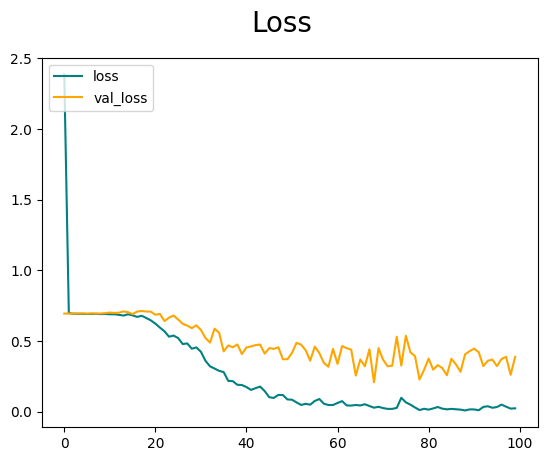

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

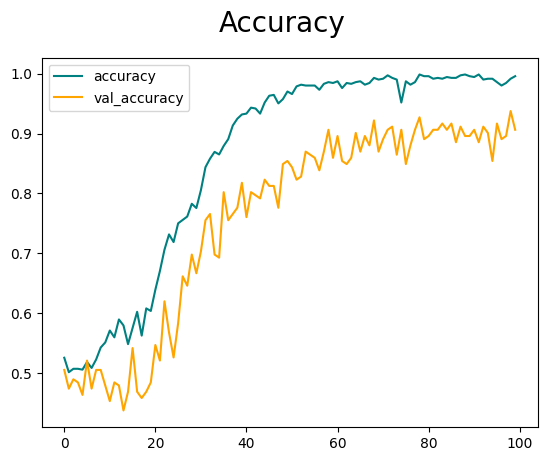

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testování a exportování

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 246ms/step


In [54]:
print(f"Precision:{pre.result()}, Recall:{re.result()}, Accuaracy:{acc.result()}")

Precision:0.930232584476471, Recall:0.930232584476471, Accuaracy:0.9375


In [55]:
model.save(os.path.join('export','lizardsnake.h5'))

C:\Users\thadd\Desktop\seminary\Seminary\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
